In [55]:
%matplotlib notebook
import numpy as np
import sigpy as sp
import sigpy.plot as pl
import cupy as cp
import scipy.io
import math
from scipy.sparse import csc_matrix
import numpy.matlib
import matplotlib.pyplot as plt
import dynamicrecon
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [56]:
cp.cuda.Device(4).use()

In [57]:
M = np.load("../../patchwise_dynamic_recon_data/M0_fista_0_01_10000.npy")
C = cp.load("../../patchwise_dynamic_recon_data/C0_fista_0_01_10000.npy")

In [58]:
Converge_fista = np.load("../../patchwise_dynamic_recon_data/converge_fista_0_01_10000.npy")
Converge_ista = np.load("../../patchwise_dynamic_recon_data/converge_ista_0_05.npy")

In [59]:
Converge_fista[-1]

array(11.38544182)

<IPython.core.display.Javascript object>


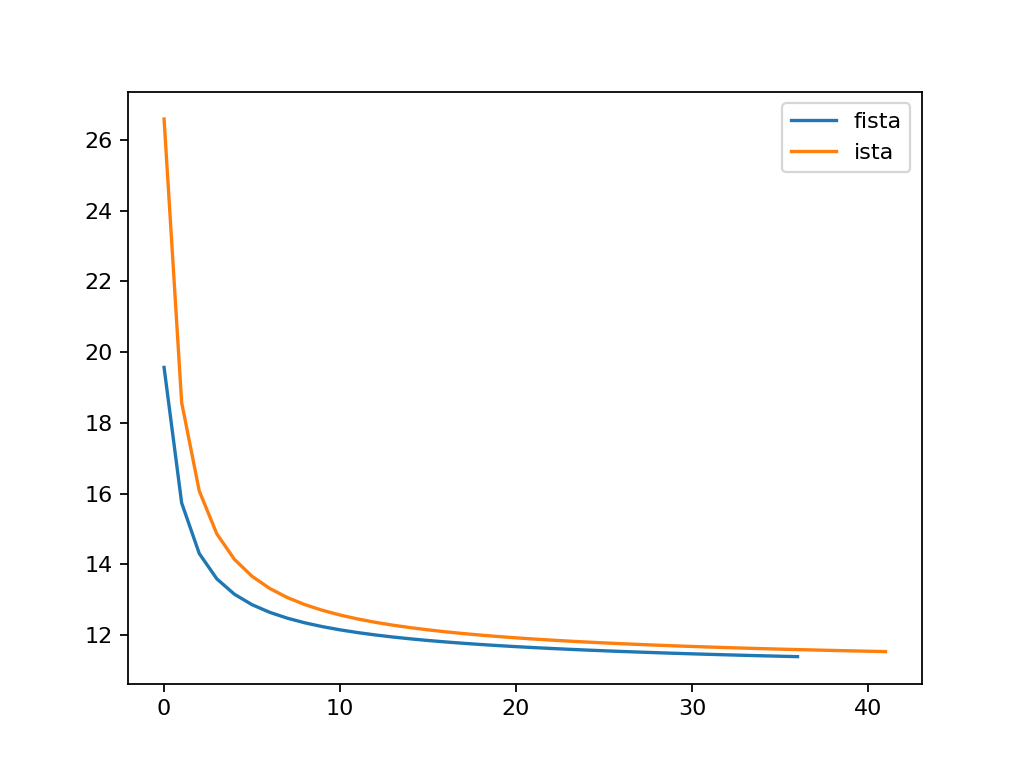

In [60]:
plt.figure()
plt.plot(Converge_fista[20::20])
plt.plot(Converge_ista[20::20])
plt.legend(["fista","ista"])
plt.show()

<IPython.core.display.Javascript object>


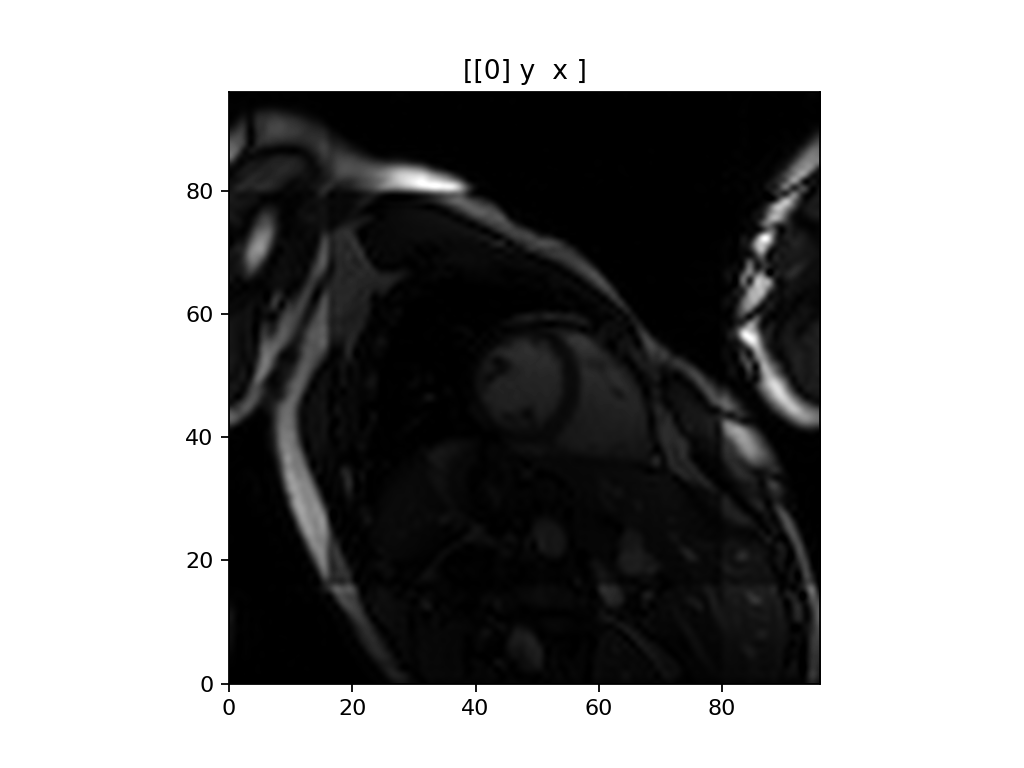

In [62]:
pl.ImagePlot(C)

In [71]:
Im = dynamicrecon.modelCforward(C=C,M=M)
Im = Im/abs(Im).mean(axis=(1,2))[:,None,None]

In [70]:
# load the cardiac data
cardiac_images = scipy.io.loadmat("images.mat")
imgs = cardiac_images["LplusS"]
# imgs=imgs[87:183,65:161,:]
# imgs = imgs.transpose(2,0,1)
imgs = cp.array(imgs)
# down sample images
imgs_lowres = sp.ifft(sp.fft(imgs,axes=(0,1))[128-48:128+48,128-48:128+48,:],axes=(0,1)).transpose(2,0,1)[:,::-1,::-1]
imgs_lowres = imgs_lowres/abs(imgs_lowres).mean(axis=(1,2))[:,None,None]

<IPython.core.display.Javascript object>


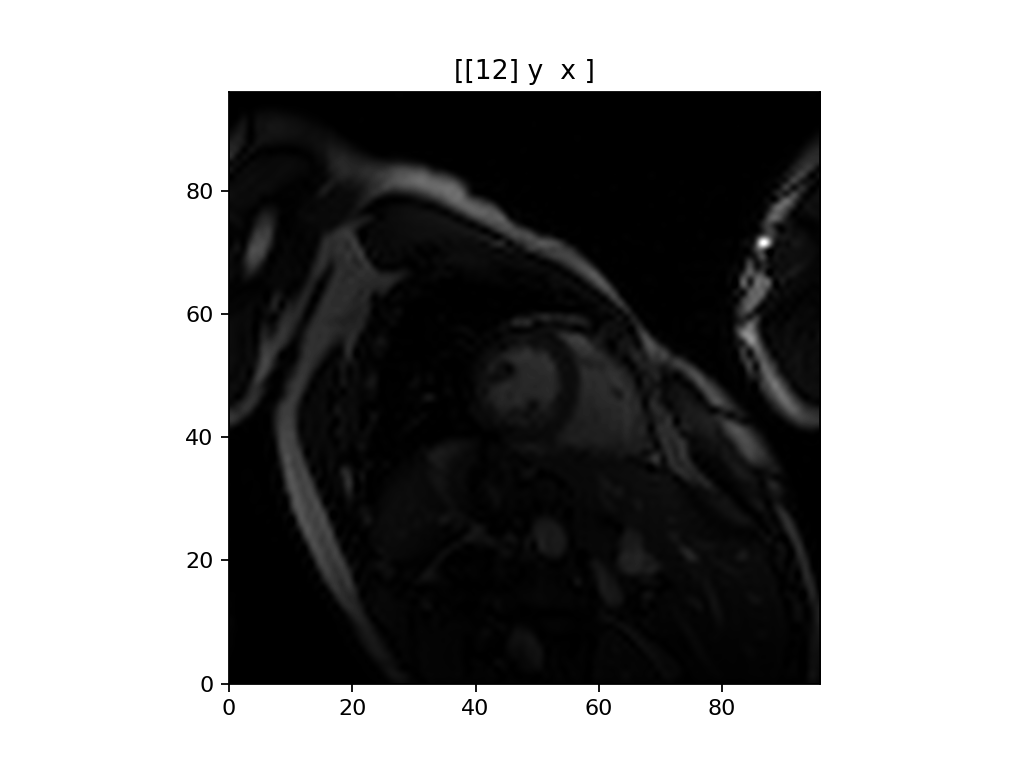

In [72]:
pl.ImagePlot(Im)

<IPython.core.display.Javascript object>


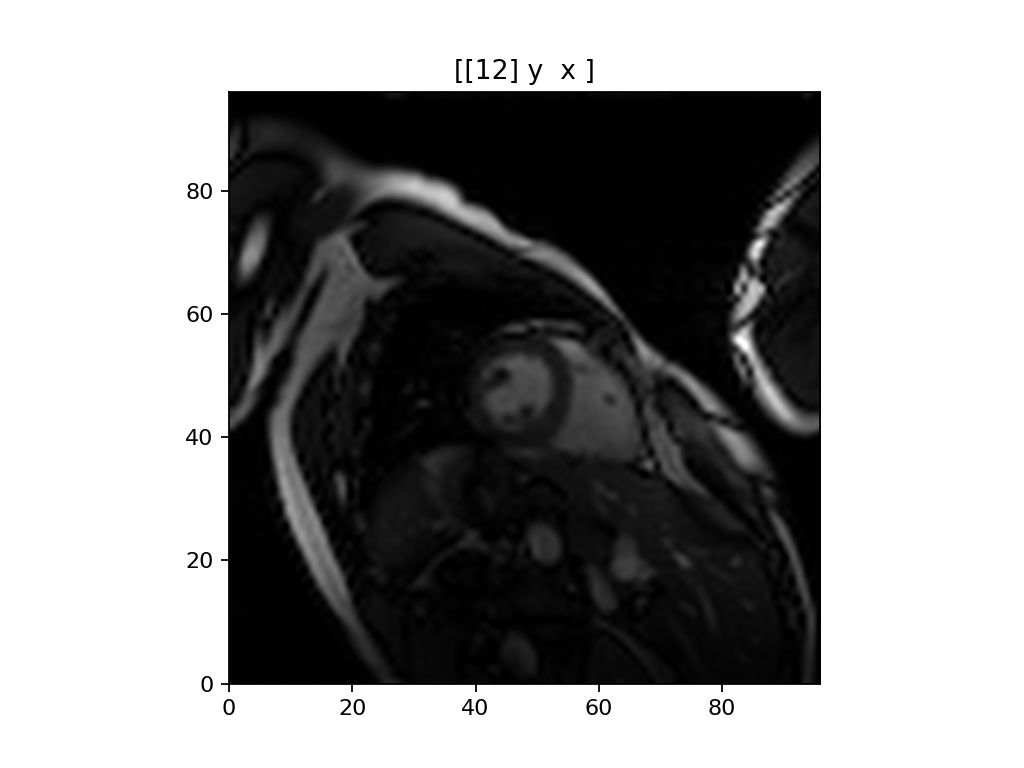

In [73]:
pl.ImagePlot(imgs_lowres)

<IPython.core.display.Javascript object>


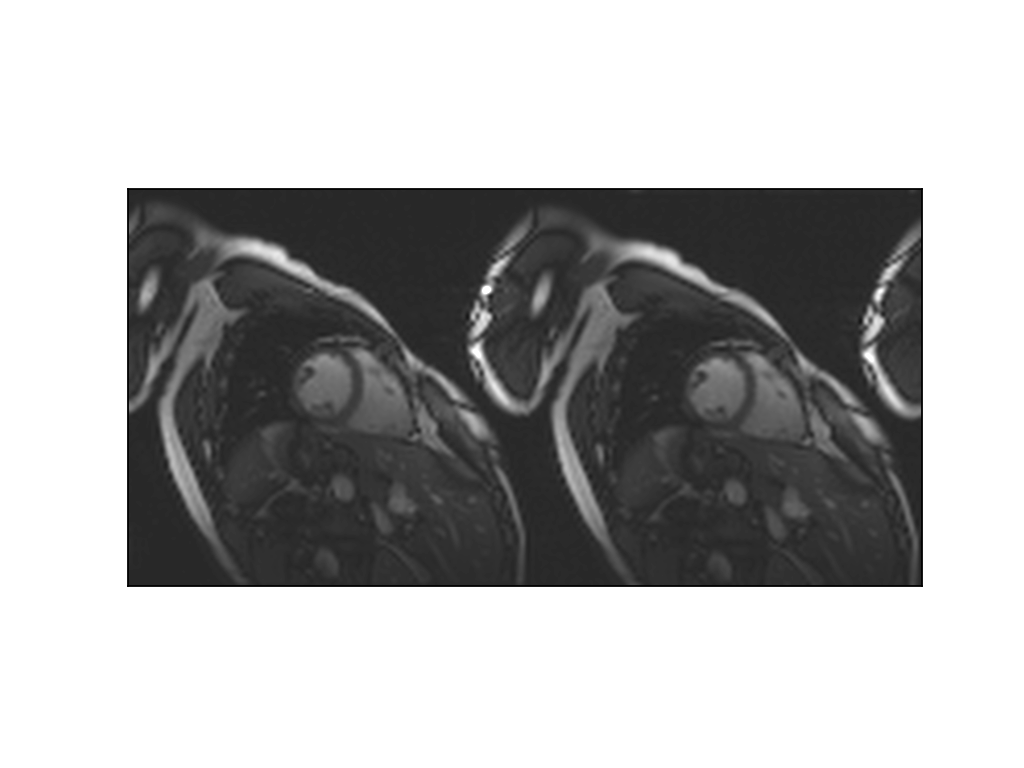

In [81]:
pl.ImagePlot(cp.concatenate((Im,imgs_lowres),axis=2))

<IPython.core.display.Javascript object>


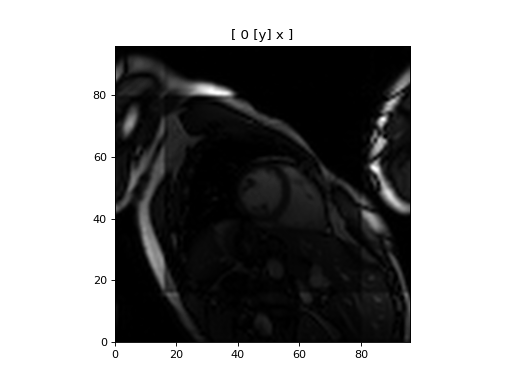

In [78]:
pl.ImagePlot(C)

<IPython.core.display.Javascript object>


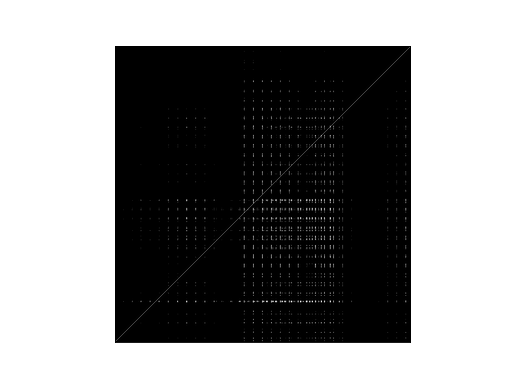

In [77]:
pl.ImagePlot(M)